In [3]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing Spotify dataset 
df = pd.read_csv("light_spotify_dataset.csv") 


In [25]:
print(df.shape)

df.info()

(236988, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236988 entries, 0 to 236987
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist            236988 non-null  object 
 1   song              236980 non-null  object 
 2   emotion           236988 non-null  object 
 3   variance          236988 non-null  float64
 4   Genre             236988 non-null  object 
 5   Release Date      236988 non-null  int64  
 6   Key               236988 non-null  object 
 7   Tempo             236988 non-null  int64  
 8   Loudness          236988 non-null  float64
 9   Explicit          236988 non-null  object 
 10  Popularity        236988 non-null  int64  
 11  Energy            236988 non-null  int64  
 12  Danceability      236988 non-null  int64  
 13  Positiveness      236988 non-null  int64  
 14  Speechiness       236988 non-null  int64  
 15  Liveness          236988 non-null  int64  
 16  Acousti

In [ ]:
dt.describe()

In [ ]:
dt.head(10)

In [ ]:
df = df.drop_duplicates()
print(df.shape)

In [5]:
missing = df.isnull().sum()
print("Missing values by column:", missing[missing > 0])

Missing values by column: song    8
dtype: int64


In [11]:
# Criate binary variable of popularity 
df['Popular'] = df['Popularity'].apply(lambda x: 1 if x >= 70 else 0)

df.head(10)


,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Popular
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2,0
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0,0
5,ABBA,Burning My Bridges,anger,-0.339935,pop,2013,C Maj,135,-7.00,No,34,92,40,43,4,31,9,0,0
6,ABBA,Cassandra,sadness,-0.097061,pop,1981,C Maj,160,-12.62,No,39,35,32,42,4,7,72,0,0
7,ABBA,Chiquitita,sadness,0.105384,pop,1979,A Maj,84,-8.11,No,74,55,50,37,4,31,73,0,1
8,ABBA,Crazy World,surprise,-0.205303,pop,1975,G# Maj,135,-9.07,No,39,60,50,55,3,29,38,0,0
9,ABBA,Crying Over You,anger,-0.068750,pop,2007,C# Maj,130,-6.94,No,56,72,51,50,7,28,20,0,0


Correlation with Release Year:
 Loudness            0.281308
Speechiness         0.224157
Danceability        0.184934
Energy              0.089272
Tempo               0.021032
Instrumentalness   -0.003710
Liveness           -0.010857
Acousticness       -0.114986
Positiveness       -0.168519
Name: Release Date, dtype: float64


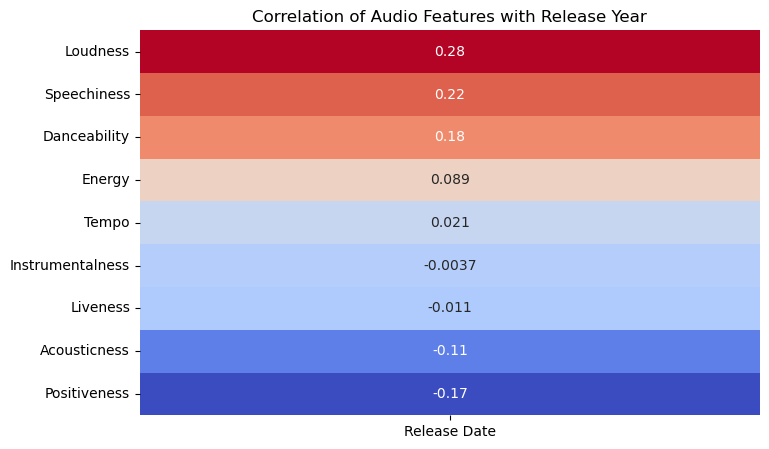

In [13]:
# 🔍 List of numerical features
features = ['Tempo', 'Loudness', 'Energy', 'Danceability', 'Positiveness',
            'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness']

# 📈 Compute correlation matrix
corr_matrix = df[['Release Date'] + features].corr()

# 📌 Get only correlation with release_year
year_corr = corr_matrix['Release Date'].drop('Release Date').sort_values(ascending=False)
print("Correlation with Release Year:\n", year_corr)

# 🔥 Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(year_corr.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation of Audio Features with Release Year")
plt.show()


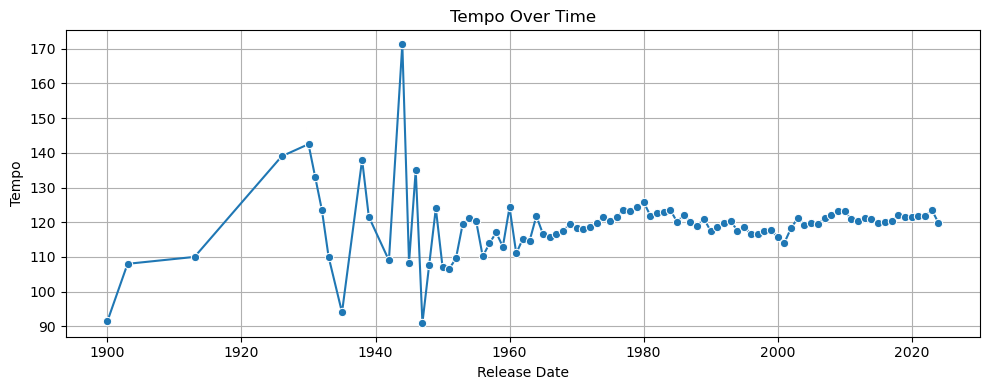

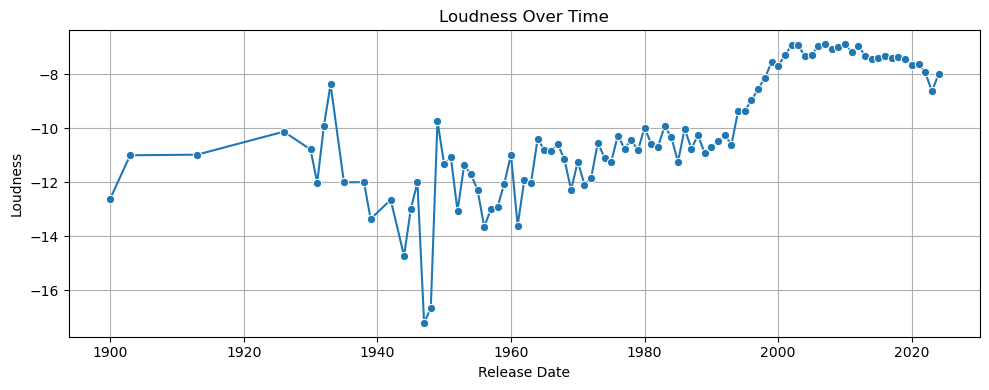

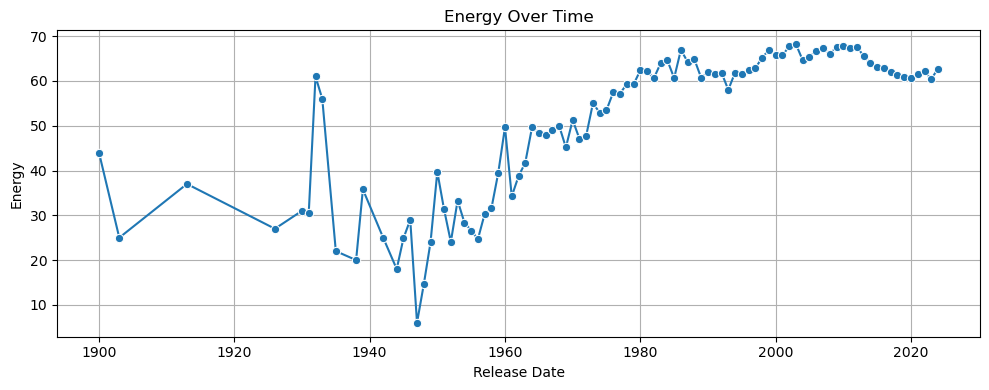

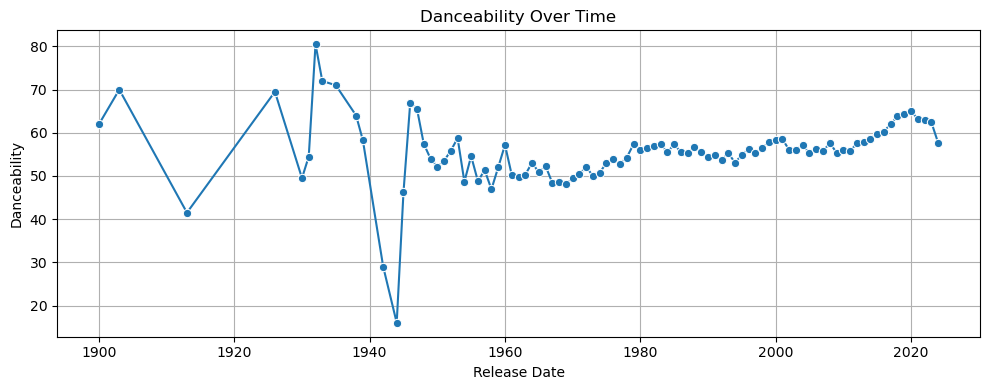

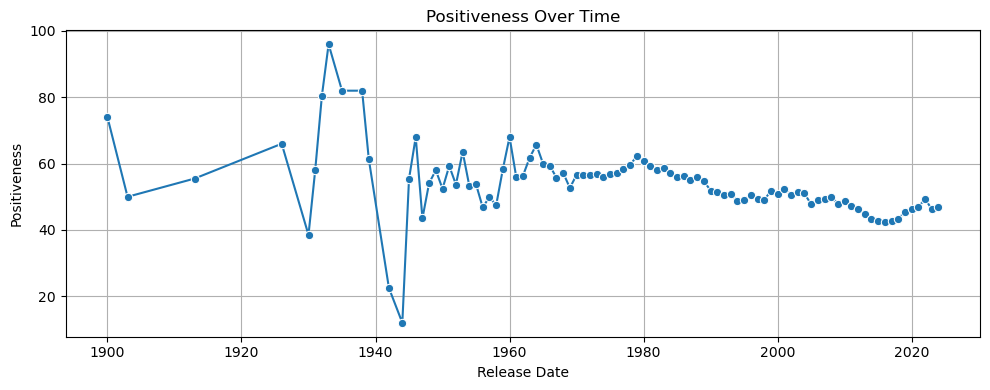

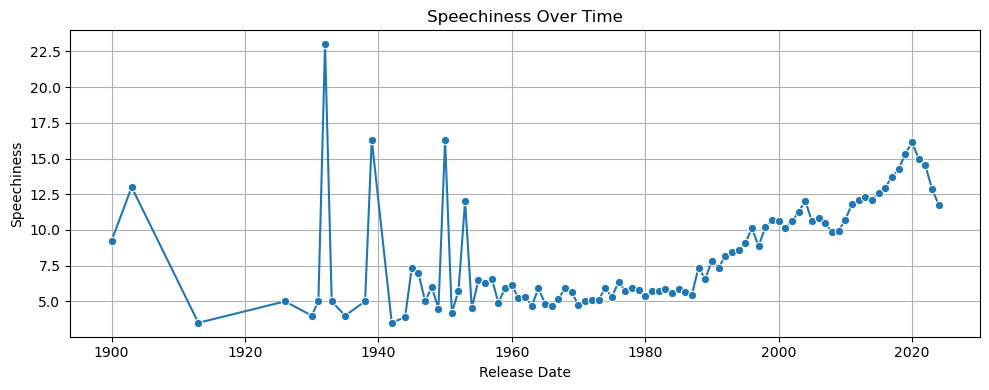

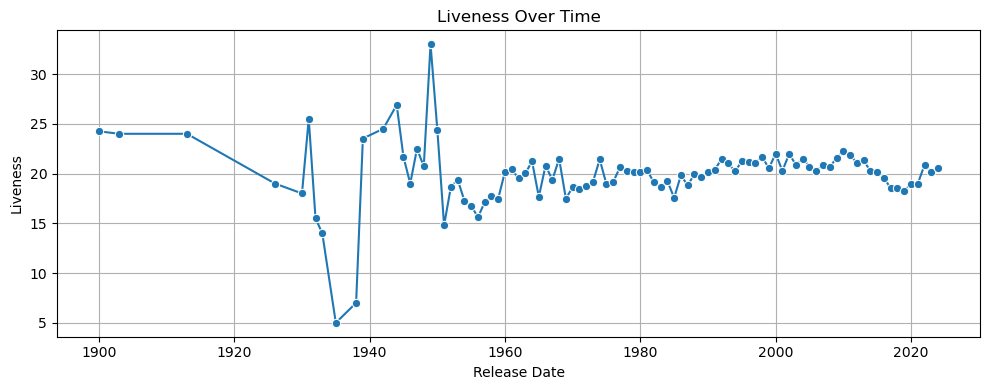

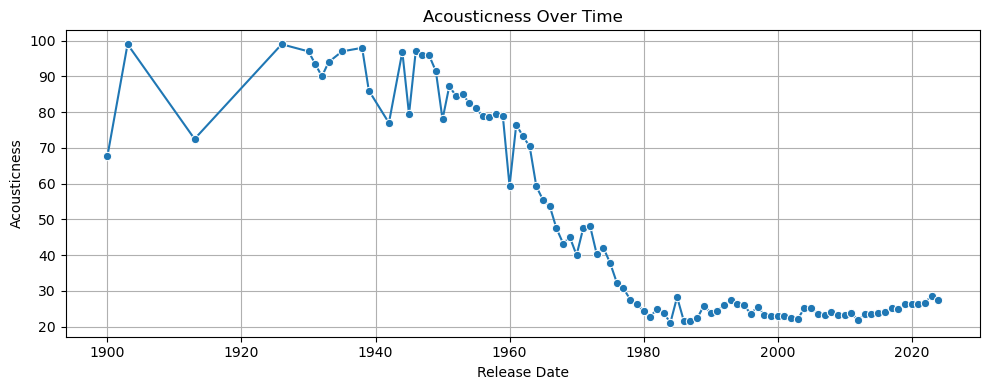

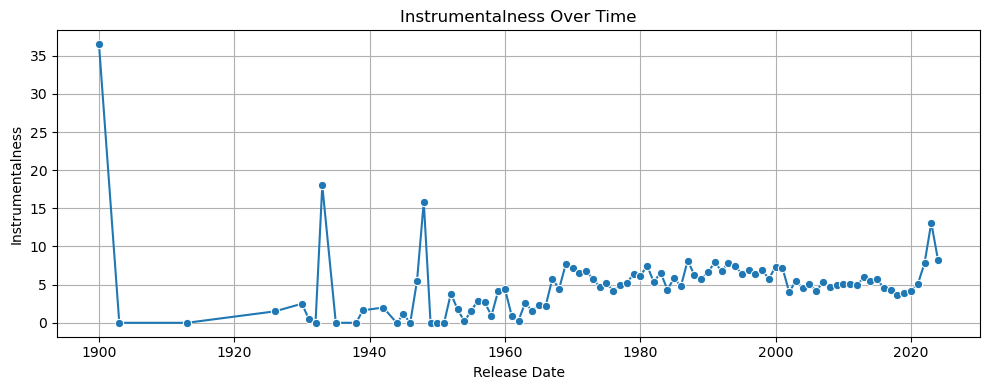

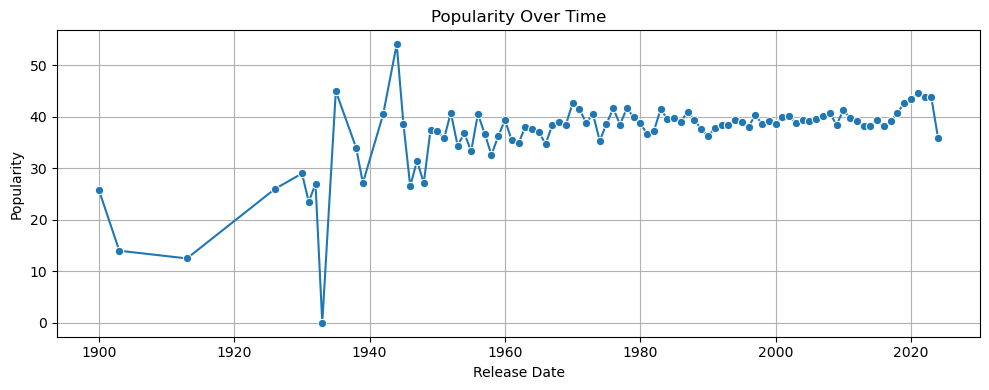

In [23]:
yearly_trends = df.groupby('Release Date')[features].mean().reset_index()

# 📊 Plot each feature over time
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=yearly_trends, x='Release Date', y=feature, marker='o')
    plt.title(f'{feature} Over Time')
    plt.xlabel('Release Date')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

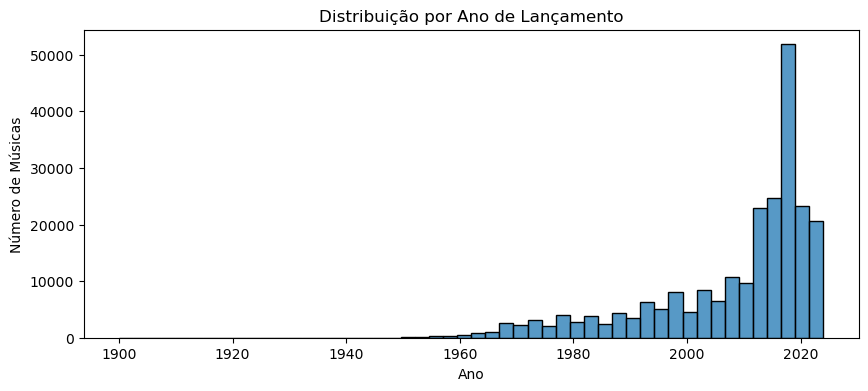

In [17]:
plt.figure(figsize=(10,4))
sns.histplot(df['Release Date'], bins=50, kde=False)
plt.title("Distribuição por Ano de Lançamento")
plt.xlabel("Ano")
plt.ylabel("Número de Músicas")
plt.show()

Correlation with Popularity:
 Loudness            0.166390
Danceability        0.101224
Energy              0.080452
Positiveness        0.035988
Tempo               0.020931
Speechiness        -0.044786
Instrumentalness   -0.067803
Liveness           -0.068005
Acousticness       -0.102343
Name: Popularity, dtype: float64


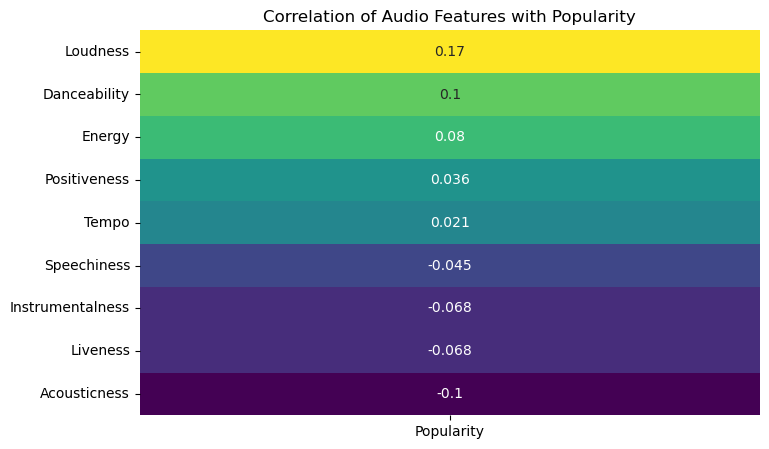

In [19]:
# 🔍 List of numerical features (including 'Popularity')
features = ['Tempo', 'Loudness', 'Energy', 'Danceability', 'Positiveness',
            'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness', 'Popularity']

# 📈 Compute correlation matrix
corr_matrix = df[features].corr()

# 📌 Get only correlation with Popularity
pop_corr = corr_matrix['Popularity'].drop('Popularity').sort_values(ascending=False)
print("Correlation with Popularity:\n", pop_corr)

# 🔥 Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pop_corr.to_frame(), annot=True, cmap='viridis', cbar=False)
plt.title("Correlation of Audio Features with Popularity")
plt.show()


In [41]:
# groups musics by 'genre' and calculates the sum of the songs
df_genre = (
    df.groupby('Genre')
      .agg(song_count=('song', 'count'))
      .reset_index()
      .sort_values('song_count', ascending=False)
      .set_index("Genre")
)

df_genre.head(20)

,song_count
Genre,
"Unknown,Unknown,Unknown",50016
pop,46882
rap,33202
alternative,19047
hip-hop,17317
rock,12956
folk,10620
metal,10491
soul,8741


In [51]:
unknown_artists = (
    df[df['Genre'] == 'Unknown,Unknown,Unknown']
    .groupby('artist')
    .agg(song_count=('song', 'count'))
    .reset_index()
    .sort_values('song_count', ascending=False)
)

unknown_artists.head(10)

,artist,song_count
5989,Genius English Translations,1604
5990,Genius Romanizations,270
8822,King Gizzard & The Lizard Wizard,154
11196,Moneybagg Yo,154
4879,Eddie Cochran,128
7720,Jhen Aiko,120
6606,Hillsong Worship,119
13563,Rod Wave,117
11191,Money Man,113
3610,D-Block Europe,105


In [53]:
# Step 1: Get top genres excluding 'Unknown'
top_genres = (
    df['Genre']
    .value_counts()
    .drop('Unknown,Unknown,Unknown')  # remove 'Unknown'
    .head(10)
    .index
    .tolist()
)

# Step 2: Filter the DataFrame
df_top_genres = df[df['Genre'].isin(top_genres)]

In [55]:
df_top_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168707 entries, 0 to 236854
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist            168707 non-null  object 
 1   song              168702 non-null  object 
 2   emotion           168707 non-null  object 
 3   variance          168707 non-null  float64
 4   Genre             168707 non-null  object 
 5   Release Date      168707 non-null  int64  
 6   Key               168707 non-null  object 
 7   Tempo             168707 non-null  int64  
 8   Loudness          168707 non-null  float64
 9   Explicit          168707 non-null  object 
 10  Popularity        168707 non-null  int64  
 11  Energy            168707 non-null  int64  
 12  Danceability      168707 non-null  int64  
 13  Positiveness      168707 non-null  int64  
 14  Speechiness       168707 non-null  int64  
 15  Liveness          168707 non-null  int64  
 16  Acousticness      168707 

In [57]:
# groups musics by 'emotion' and calculates the sum 

df_top_emotions = (
    df.groupby('emotion')
      .agg(song_count=('song', 'count'),
          popular_songs=('Popular',>=70)
      .reset_index()
      .sort_values('song_count', ascending=False)
      .set_index("emotion")
)

df_top_emotions.head(20)

,song_count
emotion,
joy,91529
sadness,71157
anger,47190
love,12802
fear,11960
surprise,2332
True,7
angry,1
pink,1


In [61]:
# Total count of songs per Emotion
total_counts = df.groupby('emotion').agg(total_songs=('song', 'count'))

# Count of popular songs (Popularity >= 70) per Emotion
popular_counts = (
    df[df['Popularity'] >= 70]
    .groupby('emotion')
    .agg(popular_songs=('song', 'count'))
)

# Merge the two DataFrames
emotion_summary = total_counts.merge(popular_counts, on='emotion', how='left').fillna(0)

# Convert popular_songs to integer (optional)
emotion_summary['popular_songs'] = emotion_summary['popular_songs'].astype(int)

# Reset index if you prefer a normal DataFrame view
emotion_summary = emotion_summary.reset_index()

# Add proportion column
emotion_summary['popular_ratio'] = (emotion_summary['popular_songs'] / emotion_summary['total_songs']).round(2)

# Optional: format as percentage
emotion_summary['popular_percentage'] = (emotion_summary['popular_ratio'] * 100).round(1).astype(str) + '%'

print(emotion_summary)

    emotion  total_songs  popular_songs  popular_ratio popular_percentage
0      True            7              0           0.00               0.0%
1     anger        47190           3902           0.08               8.0%
2     angry            1              0           0.00               0.0%
3      fear        11960            807           0.07               7.0%
4       joy        91529           6844           0.07               7.0%
5      love        12802            974           0.08               8.0%
6      pink            1              0           0.00               0.0%
7   sadness        71157           4809           0.07               7.0%
8  surprise         2332            163           0.07               7.0%
9    thirst            1              0           0.00               0.0%


In [71]:
# Step 1: Get top genres excluding 'Unknown'
top_emotion = (
    df_top_genres['emotion']
    .value_counts()
    .head(6)
    .index
    .tolist()
)

# Step 2: Filter the DataFrame
df_top_genres_emotions = df_top_genres[df_top_genres['emotion'].isin(top_emotion)]

In [75]:
# Group by Emotion and calculate mean
audio_by_emotion = df_top_genres_emotions.groupby('emotion')[features].mean().round(2)

audio_by_emotion

,Tempo,Loudness,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Popularity
emotion,,,,,,,,,,
anger,121.54,-7.32,66.96,62.79,48.00,16.24,21.02,19.47,4.74,40.76
fear,121.12,-8.00,64.28,56.49,46.49,9.90,19.68,24.49,6.29,39.66
joy,120.14,-8.06,62.95,58.97,50.00,11.01,20.17,25.95,5.19,39.98
love,118.54,-8.84,57.95,57.28,49.29,8.58,19.31,32.17,5.18,39.03
sadness,120.75,-8.12,62.42,55.04,44.97,8.87,19.41,26.87,6.29,39.59
surprise,119.83,-8.32,61.79,57.28,48.30,9.83,19.40,28.20,5.85,40.11


In [77]:
# Group by Emotion and calculate mean
audio_by_genre = df_top_genres_emotions.groupby('Genre')[features].mean().round(2)

audio_by_genre

,Tempo,Loudness,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Popularity
Genre,,,,,,,,,,
alternative,124.64,-7.39,69.50,49.49,44.61,6.27,19.97,18.65,9.54,42.46
electronic,122.63,-7.54,67.06,59.95,43.38,8.85,19.55,19.36,15.10,41.70
folk,116.81,-11.38,43.17,53.06,47.67,5.04,18.59,55.65,5.91,34.50
hip-hop,116.04,-7.12,67.22,67.02,50.71,22.02,22.00,19.45,2.18,38.21
jazz,112.56,-12.18,35.91,52.01,47.12,6.46,19.48,65.91,5.57,31.39
metal,126.70,-5.99,85.23,42.12,34.25,9.75,22.78,4.71,12.47,40.48
pop,120.67,-7.94,61.49,57.12,48.97,6.29,18.36,27.68,4.97,40.24
rap,121.16,-7.04,65.34,69.56,47.34,21.33,20.70,18.20,2.13,42.17
rock,122.57,-9.46,63.78,51.63,56.39,5.30,22.10,26.02,6.33,37.00


In [93]:
genre_by_emotion = df_top_genres_emotions.groupby('Genre')[features].mean().reset_index()
genre_by_emotion
#for emotion in top_emotion: 
    

,Genre,Tempo,Loudness,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Popularity
0,alternative,124.641065,-7.386637,69.496325,49.487610,44.607833,6.273205,19.971336,18.647260,9.541107,42.459051
1,electronic,122.633359,-7.543519,67.059681,59.950039,43.379860,8.847978,19.548017,19.355754,15.095451,41.697123
2,folk,116.812994,-11.384031,43.171657,53.059040,47.674859,5.037382,18.589831,55.650847,5.910829,34.498493
3,hip-hop,116.035690,-7.120438,67.218873,67.017729,50.712924,22.022003,22.000404,19.452587,2.177870,38.213848
4,jazz,112.561134,-12.178482,35.905625,52.009763,47.116922,6.462576,19.482101,65.913993,5.570432,31.394003
5,metal,126.702355,-5.992256,85.232625,42.123272,34.247783,9.751263,22.775098,4.705882,12.468109,40.481075
6,pop,120.666482,-7.940863,61.487053,57.120451,48.974894,6.294697,18.356533,27.675568,4.974724,40.240369
7,rap,121.156522,-7.037520,65.342740,69.562600,47.343162,21.327621,20.704906,18.204981,2.127398,42.166190
8,rock,122.570624,-9.463452,63.778558,51.632911,56.391324,5.296928,22.096094,26.016517,6.325486,37.002238
9,soul,114.753661,-8.983256,53.466590,60.494508,51.115217,9.070137,18.357666,35.366362,3.235698,41.326316


/var/folders/d1/6npcdv3x461bbl83qxpmzk500000gn/T/ipykernel_2213/1535918636.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


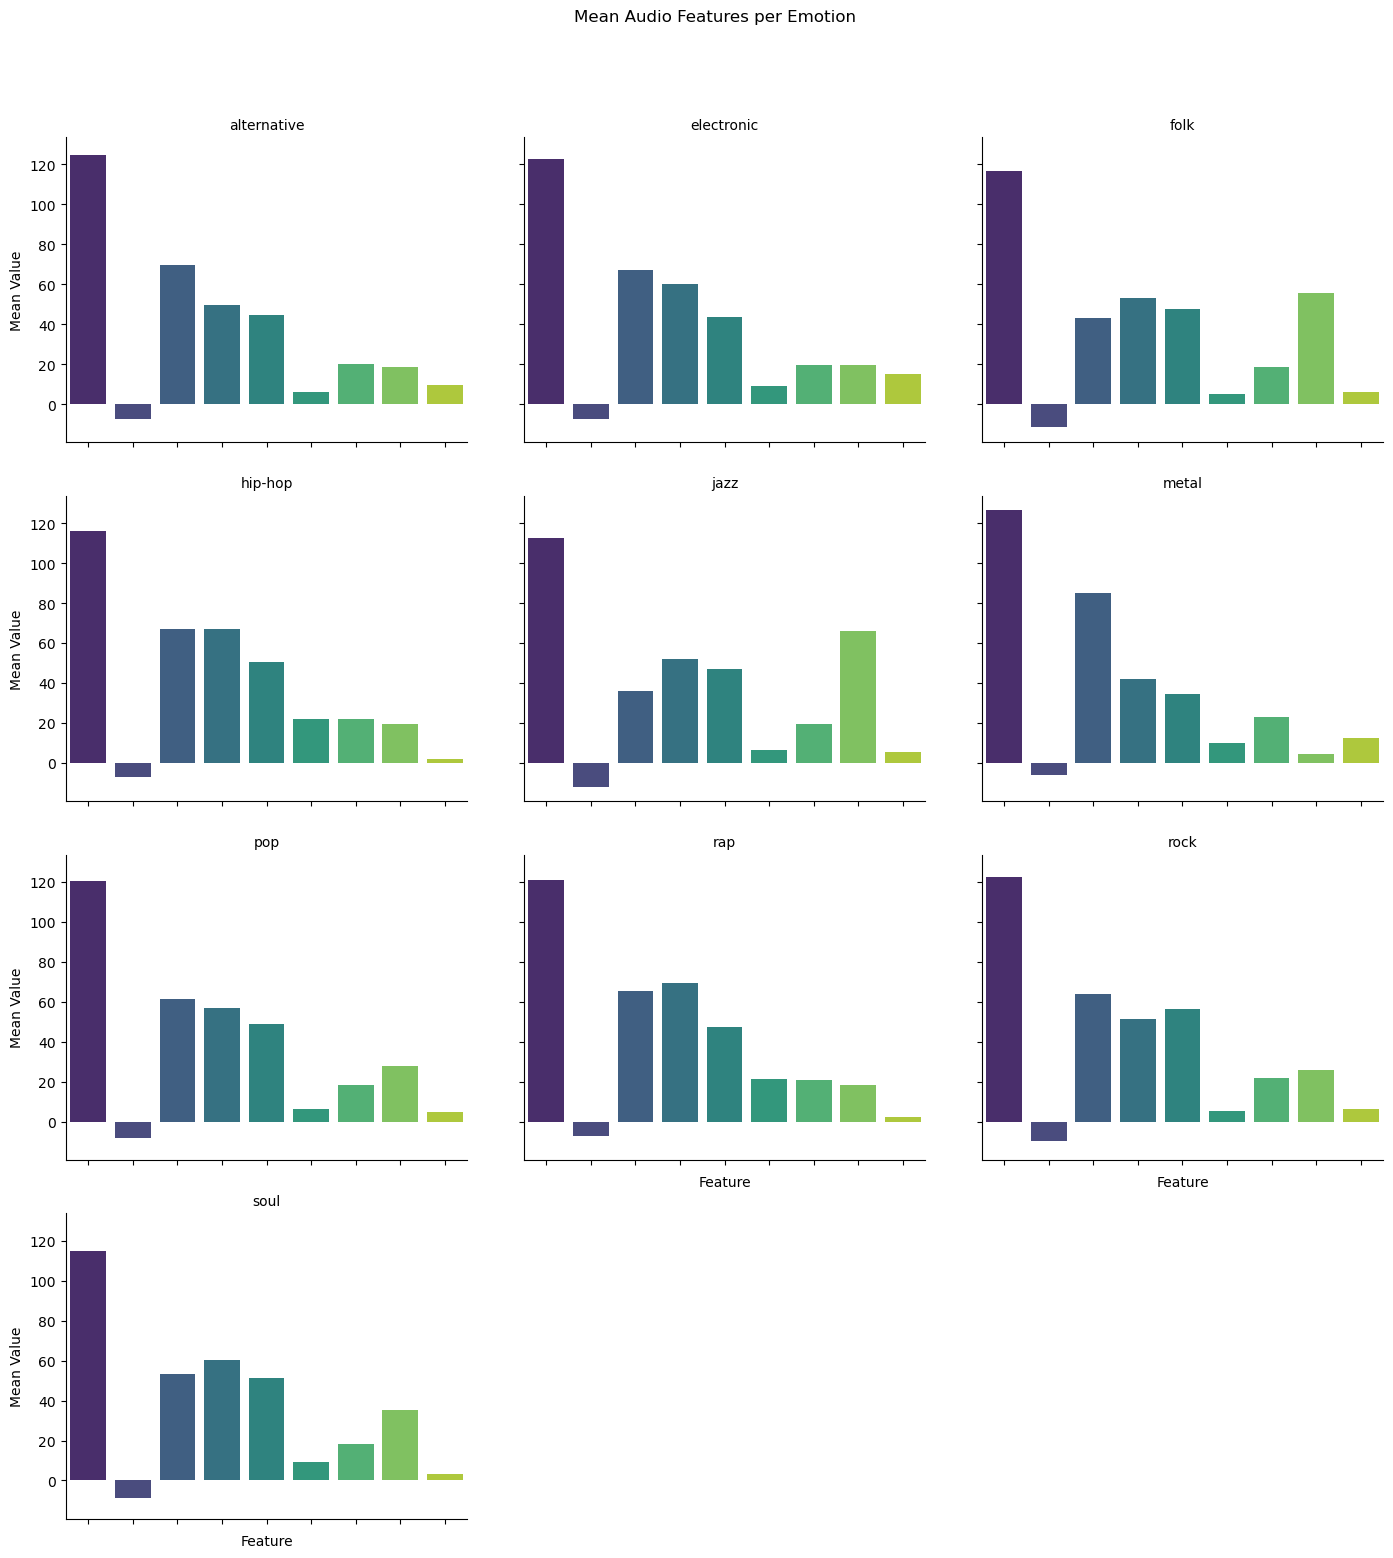

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Emotion and calculate mean of audio features
features = ['Tempo', 'Loudness', 'Energy', 'Danceability', 'Positiveness',
            'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness']

audio_by_emotion = df_top_genres_emotions.groupby('Genre')[features].mean().reset_index()

# Melt the dataframe for easier plotting with seaborn
melted = audio_by_emotion.melt(id_vars='Genre', var_name='Feature', value_name='Mean Value')

# Plot
g = sns.catplot(
    data=melted,
    x='Feature', y='Mean Value',
    col='Genre', kind='bar',
    col_wrap=3, height=4, aspect=1.2,
    palette='viridis'
)

g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Mean Audio Features per Emotion")
plt.show()

/var/folders/d1/6npcdv3x461bbl83qxpmzk500000gn/T/ipykernel_2213/2853862677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_by_genre, x=feature, y='Genre', palette='viridis')


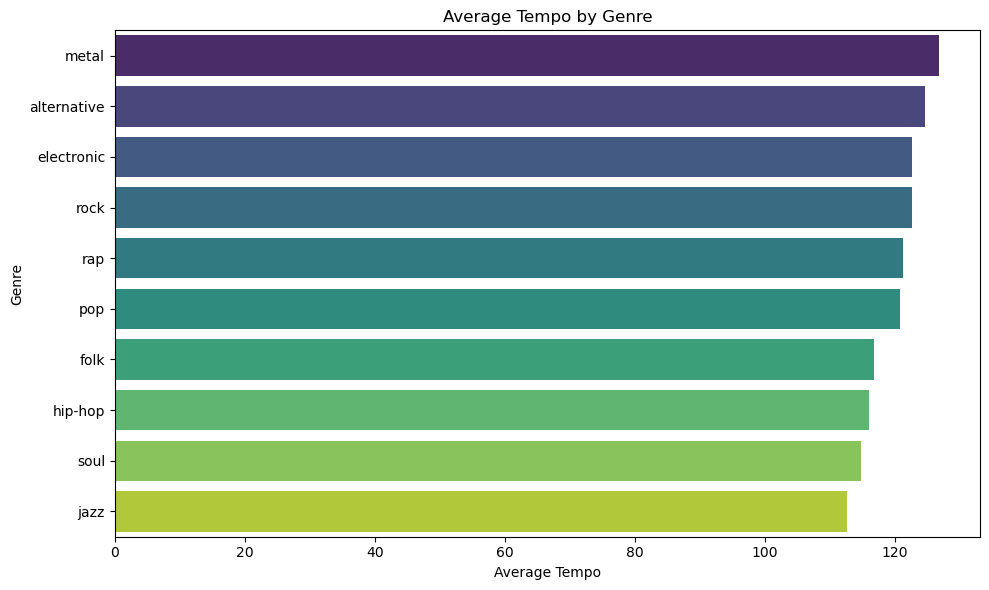

/var/folders/d1/6npcdv3x461bbl83qxpmzk500000gn/T/ipykernel_2213/2853862677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_by_genre, x=feature, y='Genre', palette='viridis')


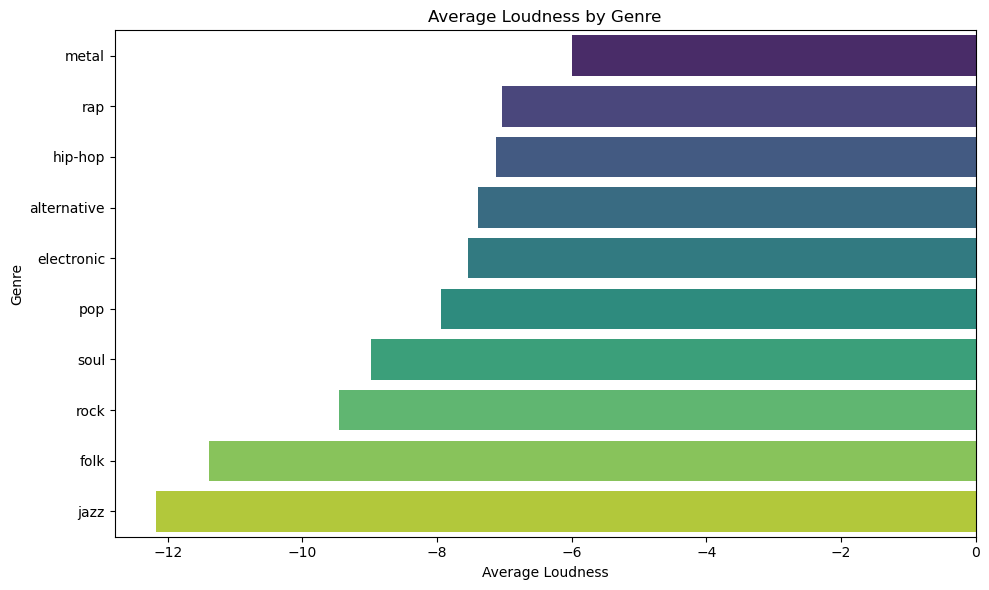

/var/folders/d1/6npcdv3x461bbl83qxpmzk500000gn/T/ipykernel_2213/2853862677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_by_genre, x=feature, y='Genre', palette='viridis')


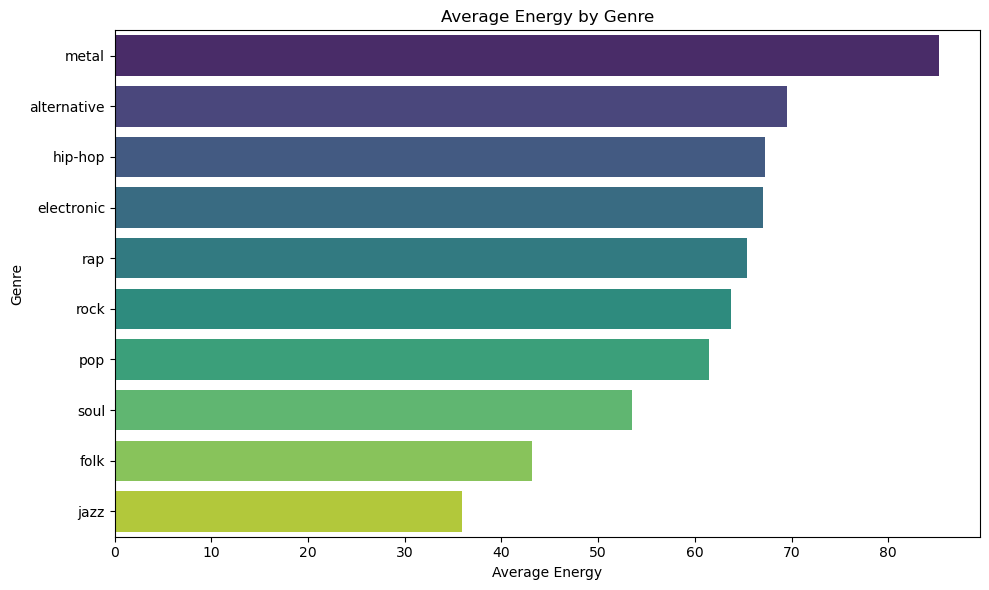

/var/folders/d1/6npcdv3x461bbl83qxpmzk500000gn/T/ipykernel_2213/2853862677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_by_genre, x=feature, y='Genre', palette='viridis')


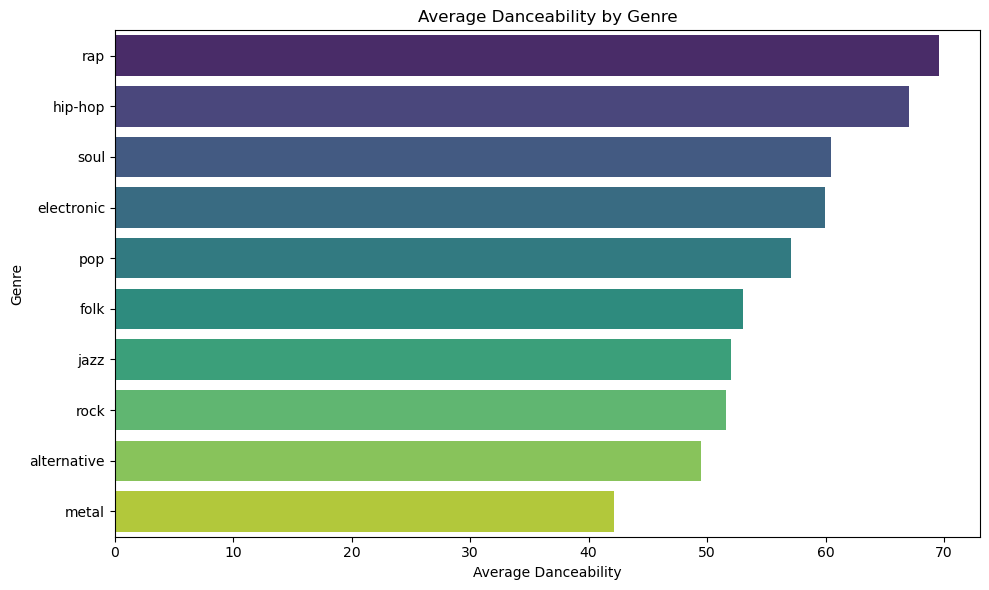

/var/folders/d1/6npcdv3x461bbl83qxpmzk500000gn/T/ipykernel_2213/2853862677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_by_genre, x=feature, y='Genre', palette='viridis')


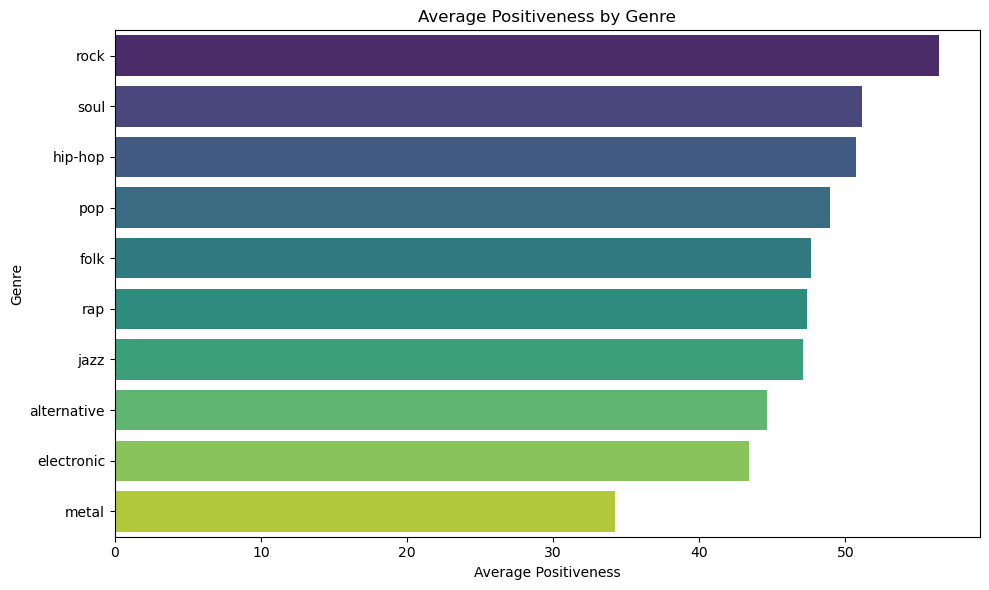

/var/folders/d1/6npcdv3x461bbl83qxpmzk500000gn/T/ipykernel_2213/2853862677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_by_genre, x=feature, y='Genre', palette='viridis')


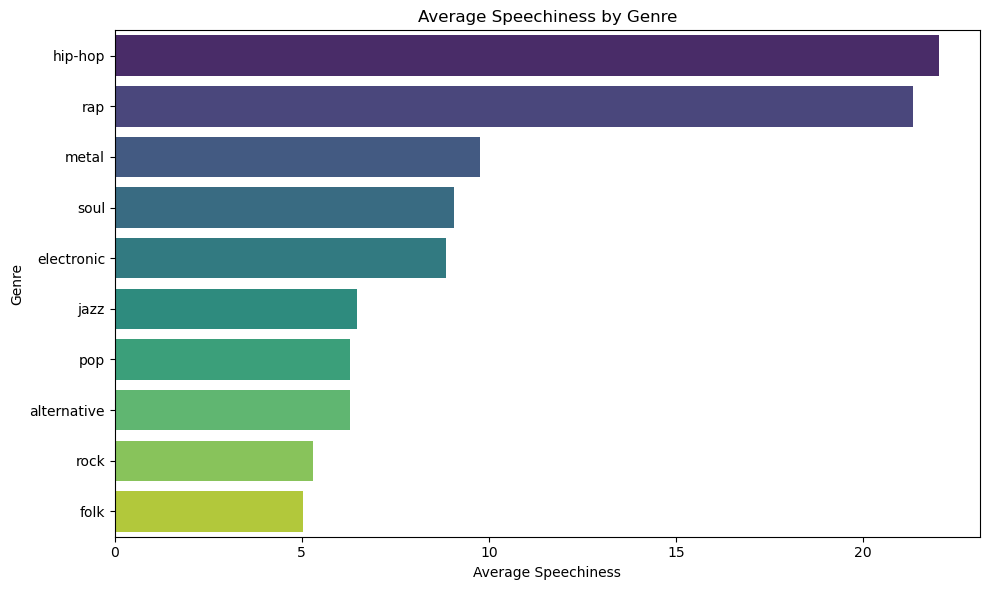

/var/folders/d1/6npcdv3x461bbl83qxpmzk500000gn/T/ipykernel_2213/2853862677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_by_genre, x=feature, y='Genre', palette='viridis')


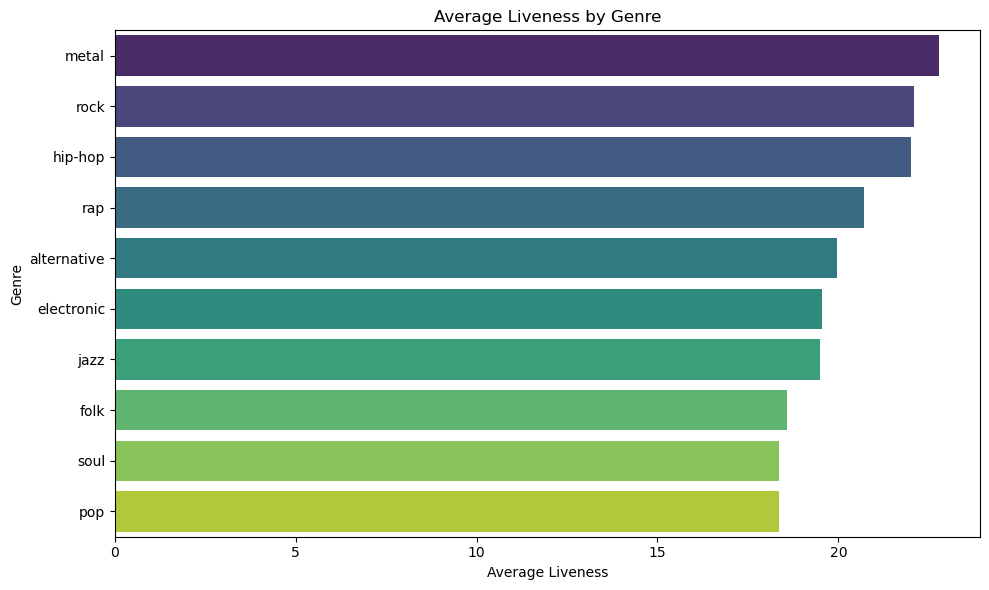

/var/folders/d1/6npcdv3x461bbl83qxpmzk500000gn/T/ipykernel_2213/2853862677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_by_genre, x=feature, y='Genre', palette='viridis')


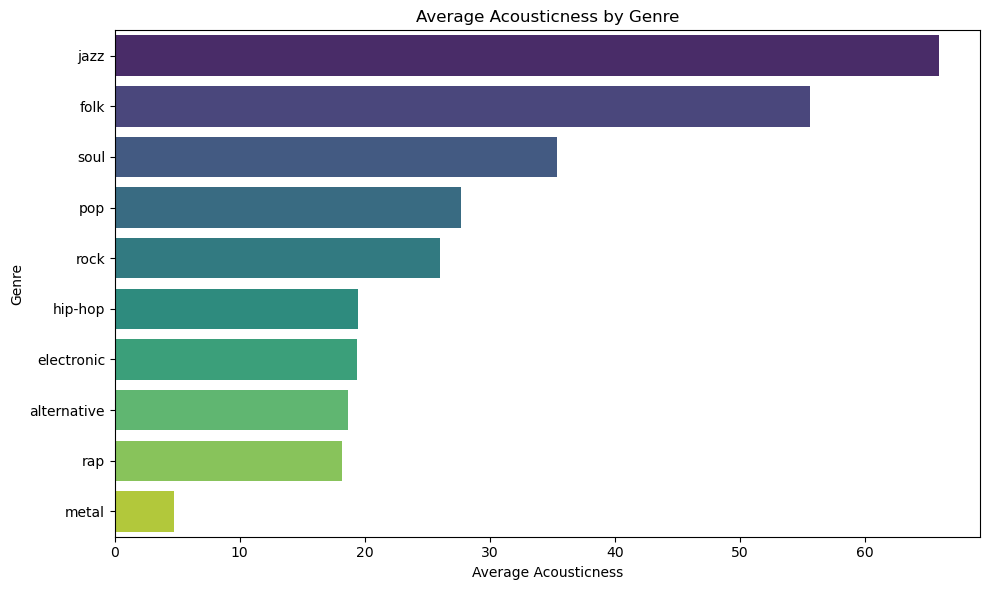

/var/folders/d1/6npcdv3x461bbl83qxpmzk500000gn/T/ipykernel_2213/2853862677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_by_genre, x=feature, y='Genre', palette='viridis')


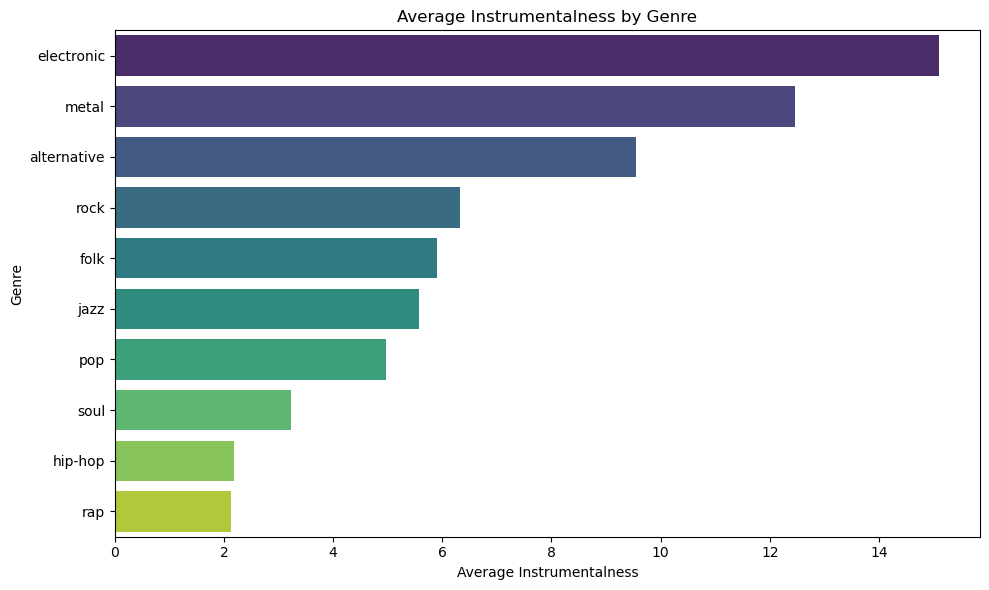

In [113]:
# Group by Genre and calculate mean for each feature
for feature in features: 
    feature_by_genre = (
        df_top_genres_emotions.groupby('Genre')[feature]
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_by_genre, x=feature, y='Genre', palette='viridis')
    plt.title(f"Average {feature} by Genre")
    plt.xlabel(f"Average {feature}")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()


In [115]:
df = df_top_genres_emotions

In [ ]:
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Data preprocessing
# Convert categorical variables
df['Explicit'] = df['Explicit'].map({'Yes': 1, 'No': 0})

# Feature selection
features = ['emotion', 'Genre', 'Key', 'Tempo', 'Loudness', 'Energy', 
            'Danceability', 'Positiveness', 'Speechiness', 'Liveness',
            'Acousticness', 'Instrumentalness', 'Explicit', 'Release Date']
target = 'Popularity'

# Split data
X = df[features]
y = df[target]

# Preprocessing pipeline
categorical_features = ['emotion', 'Genre', 'Key']
numeric_features = ['Tempo', 'Loudness', 'Energy', 'Danceability', 
                   'Positiveness', 'Speechiness', 'Liveness',
                   'Acousticness', 'Instrumentalness', 'Release Date']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Models to try
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R2': r2}
    
    # Feature importance for Random Forest
    if name == "Random Forest":
        feature_names = (numeric_features + 
                         list(pipeline.named_steps['preprocessor']
                         .named_transformers_['cat']
                         .get_feature_names_out(categorical_features)))
        
        importances = pipeline.named_steps['model'].feature_importances_
        plt.figure(figsize=(12, 8))
        plt.barh(feature_names, importances)
        plt.title("Feature Importance")
        plt.show()

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  R²: {metrics['R2']:.2f}")
    print()

sklearn: 1.5.1
